In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the dataset with proper encoding
file_path = 'ClectivSampleDataContentCreatorProfiles.csv'
df = pd.read_csv(file_path, encoding='latin1')


In [3]:
df.head()

,fullname,username,link,platform,followers,engagements,engagement_rate,avg_comments,avg_likes,avg_reels_plays,...,age_45_64,age_65,audience_credibility,top_country,top_country_2,top_country_3,top_city,top_city_2,top_city_3,CREDIBILITY SCORE (fraud detection)
0,EMILY DAVIES,emdavies___,https://www.instagram.com/emdavies___,instagram,400165.0,27295.0,0.068135,88.0,27295.0,246273.0,...,2.34%,0.01%,75.18%,Australia 44.20%,United Kingdom 17.60%,United States 12.99%,Perth 9.55%,Melbourne 6.39%,Brisbane 4.38%,75.0
1,Finlay Joyce-Noorlander,finllaayy,https://www.instagram.com/finllaayy,instagram,166100.0,5238.0,0.032058,42.0,5238.0,109180.0,...,2.24%,0.02%,79.66%,Australia 49.03%,United States 19.22%,United Kingdom 10.80%,Adelaide 19.77%,Melbourne 2.99%,Gold Coast 2.70%,90.0
2,Ali Baxter,miss.ali.b,https://www.instagram.com/miss.ali.b,instagram,164756.0,NaN,NaN,24.0,NaN,5549.0,...,16.95%,0.19%,31.22%,Australia 21.04%,United States 19.74%,United Kingdom 4.52%,Sydney 7.30%,Melbourne 3.06%,Los Angeles 1.73%,NaN
3,CONAGH KATHLEEN ???????,conagh_kat,https://www.instagram.com/conagh_kat,instagram,124042.0,6639.0,0.053206,1786.0,6639.0,180780.0,...,0.84%,0.00%,86.02%,United States 30.93%,Australia 28.08%,United Kingdom 9.94%,Brisbane 4.71%,Melbourne 3.97%,Sydney 2.50%,65.0
4,~ Clara Felicity Smith ??? ~,clara_smithh,https://www.instagram.com/clara_smithh,instagram,109065.0,2938.0,0.026965,24.0,2938.0,45566.0,...,11.41%,0.04%,59.33%,Australia 25.13%,United States 21.55%,United Kingdom 5.51%,Brisbane 6.47%,Melbourne 3.86%,Sydney 2.63%,30.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   fullname                             20 non-null     object 
 1   username                             20 non-null     object 
 2   link                                 20 non-null     object 
 3   platform                             20 non-null     object 
 4   followers                            20 non-null     float64
 5   engagements                          15 non-null     float64
 6   engagement_rate                      15 non-null     float64
 7   avg_comments                         18 non-null     float64
 8   avg_likes                            15 non-null     float64
 9   avg_reels_plays                      19 non-null     float64
 10  avg_views                            1 non-null      float64
 11  males                             

In [7]:
df.dtypes


fullname                                object
username                                object
link                                    object
platform                                object
followers                              float64
engagements                            float64
engagement_rate                        float64
avg_comments                           float64
avg_likes                              float64
avg_reels_plays                        float64
avg_views                              float64
males                                   object
females                                 object
age_18_24                               object
age_25_34                               object
age_35_44                               object
age_45_64                               object
age_65                                  object
audience_credibility                    object
top_country                             object
top_country_2                           object
top_country_3

In [8]:
df.isnull().sum()

fullname                                2
username                                2
link                                    2
platform                                2
followers                               2
engagements                             7
engagement_rate                         7
avg_comments                            4
avg_likes                               7
avg_reels_plays                         3
avg_views                              21
males                                   2
females                                 2
age_18_24                               2
age_25_34                               2
age_35_44                               2
age_45_64                               3
age_65                                  3
audience_credibility                    3
top_country                             2
top_country_2                           2
top_country_3                           2
top_city                                3
top_city_2                        

In [9]:
# Fill missing numerical values with the column mean
numeric_cols = ['followers', 'engagements', 'engagement_rate', 
                'avg_comments', 'avg_likes', 'avg_reels_plays', 
                'avg_views', 'CREDIBILITY SCORE (fraud detection)']
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].mean())




In [10]:


# Fill missing categorical values with the mode
categorical_cols = ['fullname', 'username', 'link', 'platform', 'top_country', 
                    'top_country_2', 'top_country_3', 'top_city', 
                    'top_city_2', 'top_city_3']
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


In [11]:
percentage_cols = ['males', 'females', 'age_18_24', 'age_25_34', 
                   'age_35_44', 'age_45_64', 'age_65', 'audience_credibility']
for col in percentage_cols:
    df[col] = df[col].str.replace('%', '').astype(float) / 100


In [12]:
df = df.drop_duplicates()


In [15]:
text_cols = ['fullname', 'username', 'link', 'platform', 
             'top_country', 'top_country_2', 'top_country_3', 
             'top_city', 'top_city_2', 'top_city_3']
for col in text_cols:
    df[col] = df[col].str.lower()


C:\Users\lenovo\AppData\Local\Temp\ipykernel_20596\1223037517.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].str.lower()


In [16]:
df.to_csv('CreatorProfileCleanedDataset.csv', index=False)
print("Cleaned dataset saved successfully.")


Cleaned dataset saved successfully.


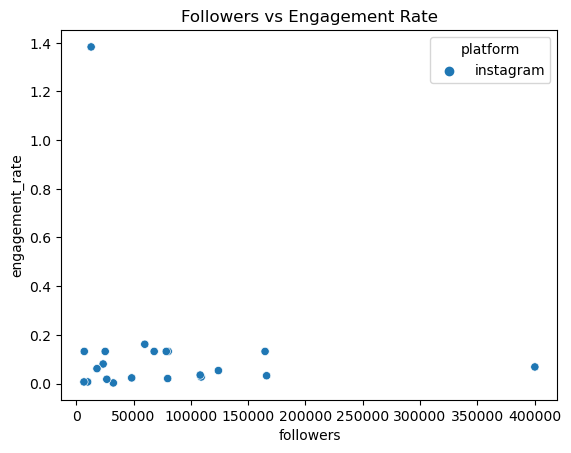

In [17]:
sns.scatterplot(x='followers', y='engagement_rate', data=df, hue='platform')
plt.title('Followers vs Engagement Rate')
plt.show()


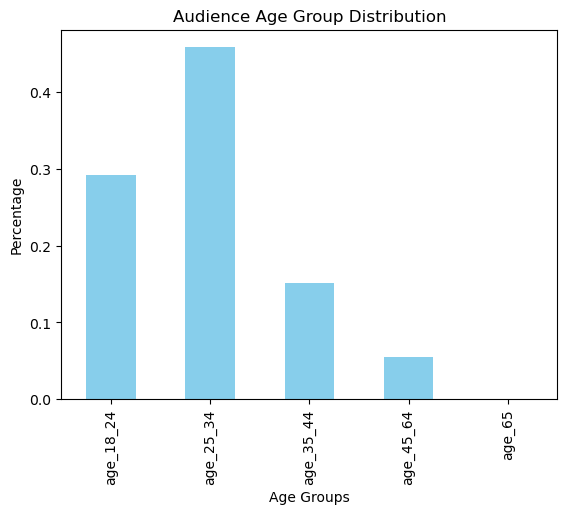

In [18]:
age_groups = ['age_18_24', 'age_25_34', 'age_35_44', 'age_45_64', 'age_65']
age_data = df[age_groups].astype(float).mean()

age_data.plot(kind='bar', color='skyblue')
plt.title('Audience Age Group Distribution')
plt.xlabel('Age Groups')
plt.ylabel('Percentage')
plt.show()


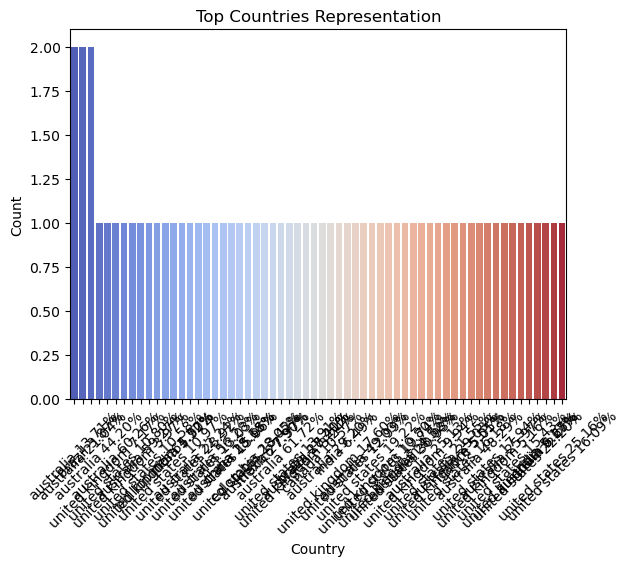

In [19]:
top_countries = ['top_country', 'top_country_2', 'top_country_3']
country_data = df[top_countries].stack().value_counts()

sns.barplot(x=country_data.index, y=country_data.values, palette='coolwarm')
plt.title('Top Countries Representation')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


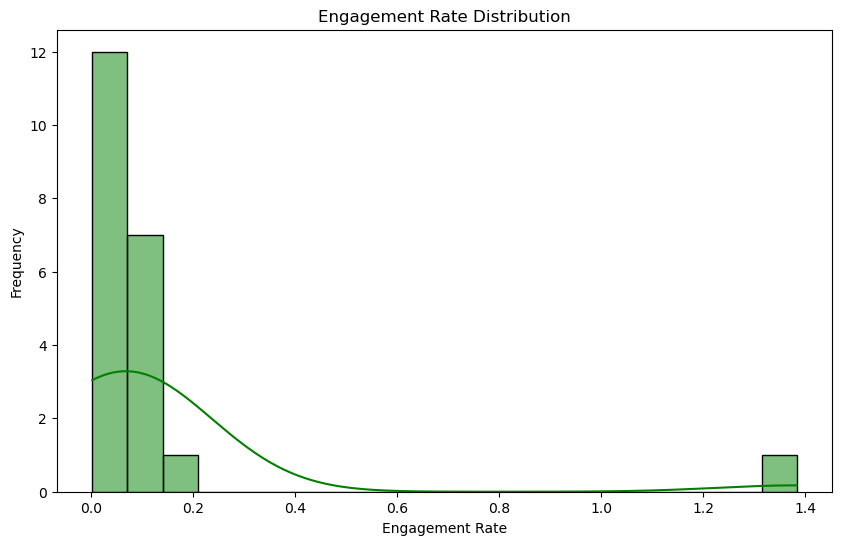

In [20]:
# Histogram of Engagement Rates
plt.figure(figsize=(10, 6))
sns.histplot(df['engagement_rate'], bins=20, kde=True, color='green')
plt.title('Engagement Rate Distribution')
plt.xlabel('Engagement Rate')
plt.ylabel('Frequency')
plt.show()

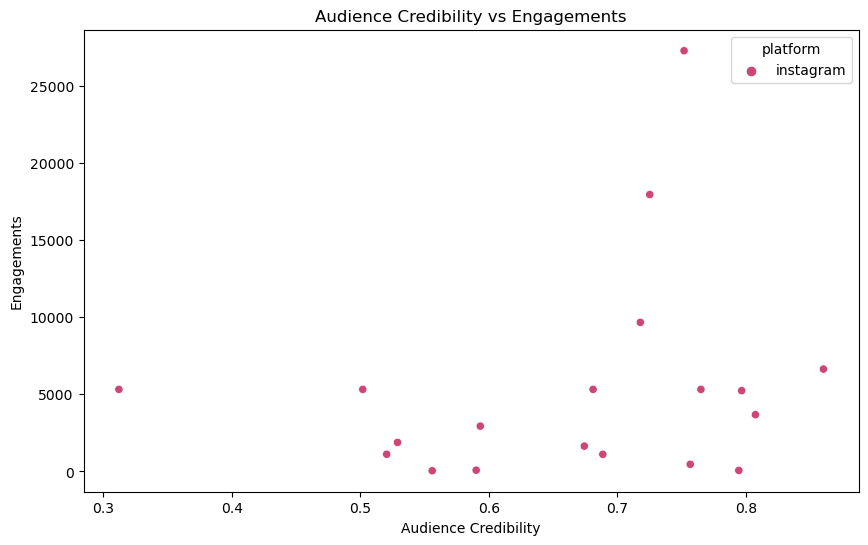

In [21]:
# Scatter plot for Audience Credibility vs Engagements
plt.figure(figsize=(10, 6))
sns.scatterplot(x='audience_credibility', y='engagements', data=df, hue='platform', palette='plasma')
plt.title('Audience Credibility vs Engagements')
plt.xlabel('Audience Credibility')
plt.ylabel('Engagements')
plt.show()